In [1]:
import pandas as pd
import numpy as np
## algorithm
from sklearn.neighbors import KNeighborsClassifier
## data spliting
from sklearn.model_selection import train_test_split
### for hyperparamter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
## evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
###
from sklearn.datasets import load_diabetes

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
## univariate analysis

In [4]:
df["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [6]:
df[df["Age"] >=100]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
df["Age"].max(),df["Age"].min() # insights

(81, 21)

<AxesSubplot:>

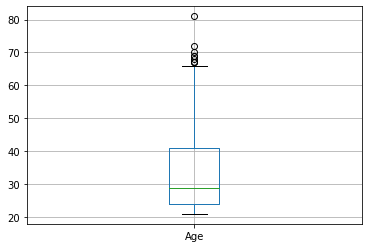

In [5]:
df[["Age"]].boxplot()

In [9]:
buckets = [0,18,30,45,60,np.inf]
labels = [0,1,2,3,4]
df["Age_bin"] = pd.cut(df["Age"],bins=buckets,labels=labels,include_lowest=True,right=False)
df["Age_bin"].value_counts()

1    396
2    239
3    101
4     32
0      0
Name: Age_bin, dtype: int64

#### Bi-variate analysis

In [16]:
df1 = df.groupby(["Glucose"])["Age_bin"].value_counts()
df1

Glucose  Age_bin
0        1          3
         2          2
         0          0
         3          0
         4          0
                   ..
199      1          1
         0          0
         2          0
         3          0
         4          0
Name: Age_bin, Length: 680, dtype: int64

In [17]:
df[["Age_bin","Age"]]
# buckets = [0,18,30,45,60,np.inf]
# labels = [0,1,2,3,4]

,Age_bin,Age
0,3,50
1,2,31
2,2,32
3,1,21
4,2,33
...,...,...
763,4,63
764,1,27
765,2,30
766,3,47


In [22]:
df["risky"] = np.where(df["Age_bin"].isin([4]),1,0)
df1 = df[df["risky"] == 1]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bin,risky
30,5,109,75,26,0,36.0,0.546,60,0,4,1
93,4,134,72,0,0,23.8,0.277,60,1,4,1
115,4,146,92,0,0,31.2,0.539,61,1,4,1
123,5,132,80,0,0,26.8,0.186,69,0,4,1
129,0,105,84,0,0,27.9,0.741,62,1,4,1


In [23]:
df1.groupby("Age").agg(glucose_min = ("Glucose","min"),
                      glucose_max = ("Glucose","max"),
                      Bp_min = ("BloodPressure","min"),
                      Bp_max = ("BloodPressure","max"))
                      

,glucose_min,glucose_max,Bp_min,Bp_max
Age,,,,
60,109,181,68,95
61,142,146,60,92
62,105,197,54,84
63,101,158,70,86
64,120,120,78,78
65,103,161,50,108
66,114,190,74,92
67,57,194,60,80
68,91,91,82,82


In [ ]:
df.groupby(["ACCT_NUM","Year"])["SALARY"].min() ##
df.groupby(["ACCT_NUM","Year"])["SALARY"].max()

In [ ]:
df.groupby(["ACCT_NUM","Year"]).agg(salary_min = ("salary","min"),
                                    salary_max = ("salary","max"))

In [24]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bin,risky
0,6,148,72,35,0,33.6,0.627,50,1,3,0


In [25]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [31]:
500 /(500+268)

0.6510416666666666

In [28]:
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

#### Train test split

In [26]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40,stratify=y)

#### Model Training

In [32]:
knn_clf = KNeighborsClassifier() # k=5,p=2
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

#### Evaluation

In [33]:
## Testing
y_pred = knn_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("CNF matrix\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("Classification report \n",clf_report)

CNF matrix
 [[81 19]
 [26 28]]
Classification report 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [34]:
## Training
y_pred = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("CNF matrix\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred)
print("Classification report \n",clf_report)

CNF matrix
 [[362  38]
 [ 76 138]]
Classification report 
               precision    recall  f1-score   support

           0       0.83      0.91      0.86       400
           1       0.78      0.64      0.71       214

    accuracy                           0.81       614
   macro avg       0.81      0.77      0.79       614
weighted avg       0.81      0.81      0.81       614



### Hyperparamter tuning

### 1) GridsearchCv

In [55]:
knn_clf = KNeighborsClassifier()
hyper_paramter = {"n_neighbors":np.arange(3,30),
                  "p":[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyper_paramter,cv=5)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=12, p=1)

#### Training on hyperparameter

In [56]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

In [57]:
## Testing
y_pred = knn_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("CNF matrix\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("Classification report \n",clf_report)

CNF matrix
 [[86 14]
 [25 29]]
Classification report 
               precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.67      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [58]:
## Training
y_pred = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("CNF matrix\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred)
print("Classification report \n",clf_report)

CNF matrix
 [[372  28]
 [102 112]]
Classification report 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       400
           1       0.80      0.52      0.63       214

    accuracy                           0.79       614
   macro avg       0.79      0.73      0.74       614
weighted avg       0.79      0.79      0.78       614



### 2) RandomizedSearchCv

In [49]:
knn_clf = KNeighborsClassifier()
hyper_paramter = {"n_neighbors":np.arange(3,100),
                  "p":[1,2]}
rscv_knn_clf = RandomizedSearchCV(knn_clf,hyper_paramter,cv=5)
rscv_knn_clf.fit(x_train,y_train)
rscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=45, p=1)

#### Training on hyperparamter

In [50]:
knn_clf = rscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=45, p=1)

In [51]:
## Testing
y_pred = knn_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("CNF matrix\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("Classification report \n",clf_report)

CNF matrix
 [[88 12]
 [28 26]]
Classification report 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [52]:
## Training
y_pred = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("CNF matrix\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred)
print("Classification report \n",clf_report)

CNF matrix
 [[370  30]
 [116  98]]
Classification report 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       400
           1       0.77      0.46      0.57       214

    accuracy                           0.76       614
   macro avg       0.76      0.69      0.70       614
weighted avg       0.76      0.76      0.74       614

